In [8]:
import pandas as pd
from module.function import *
from module.learning import *

In [9]:
from Crawl import *

In [10]:
coin_list = 'TRX,NEO,BLZ,ICX,EOS,VEN,XRP,ADA,XLM,FUN,BNB,DGD,LTC,IOTA,CTR,WTC,CND,QSP,OMG,PPT,ZRX,IOST,GXS,XVG,BQX,LSK,REQ,POWR,POE,ELF,QTUM,ENG,BTS,AION,XMR,VIBE,SNT,KNC,ETC,MANA,VIB,LEND,SUB,OST,SALT,ZEC,ENJ,NEBL,HSR,NULS,LINK,BCD,LRC,WABI,TNB,GTO,ARK,TRIG,DASH,APPC,STRAT,MTL,SNGLS,MDA,INS,GVT,TNT,AST,BAT,BTG,MCO,CDT,LUN,ARN,AMB,WAVES,ADX,FUEL,BRD,RCN,XZC,MOD,NAV,EVX,DNT,KMD,BNT,ICN,BCPT,STORJ,DLT,EDO,WINGS,SNM,MTH,OAX,YOYO'.split(',')

In [11]:
coin_dict = {}
for i in coin_list:
    coin_dict[i] = pd.read_csv('data_csv/data_{}_KRW.csv'.format(i)).drop(['Unnamed: 0'], axis = 1)

In [17]:
for i in coin_list:
    a = coin_dict[i]
    close = np.array(a.close)
    volume = np.array(a.volumeto)
    price_del = [(close[i+24]-close[i])*100/close[i] if close[i] != 0 else 0 for i in range(len(close)-24)] + [None]*24
    volume_del = [(volume[i+24]-volume[i])/volume[i] if volume[i] != 0 else 0 for i in range(len(close)-24)] + [None]*24
    a['p_del'] = price_del
    a['v_del'] = volume_del
    #coin_dict[i] = a[['p_del', 'v_del']]

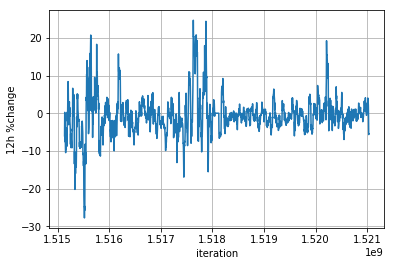

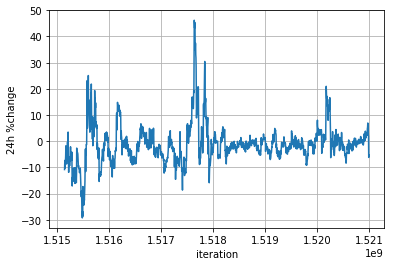

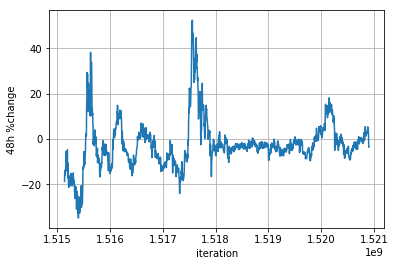

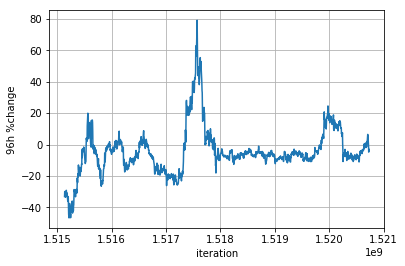

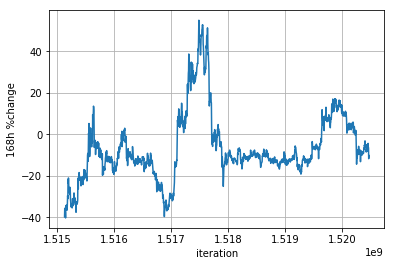

In [32]:
close = coin_dict['SNT'].close
time = coin_dict['SNT'].time
for j in [12, 24, 48, 96, 168]:
    price_del = [(close[i+j]-close[i])*100/close[i] if close[i] != 0 else 0 for i in range(len(close)-j)] + [None]*j
    plt.plot(time[350:2000], price_del[350:2000])
    plt.grid(True)
    plt.xlabel('iteration')
    plt.ylabel('{}h %change'.format(j))
    plt.show()
#plt.close()


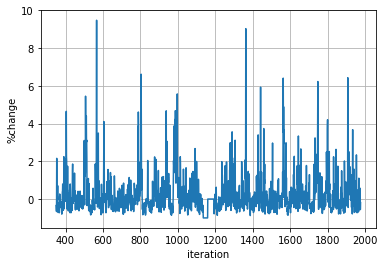

In [51]:
volume = coin_dict['ADA'].volumeto
volume_del = [(volume[i+24]-volume[i])/volume[i] if volume[i] != 0 else 0 for i in range(len(close)-24)] + [None]*24
plt.plot(range(350,2001), volume_del[350:2001])
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('%change')
plt.show()
plt.close()

In [20]:
a = a[['p_del', 'v_del']]
#a['open-close'] = a['open-close']
#a['high-low'] = a['high-low']

making label

In [38]:
label = {}
for j in coin_list:
    tag = []
    for i in range(2000):
        b = coin_dict[j]
        if (b.close[i+1] - b.close[i])/b.close[i] < -0:
            tag.append([1,0])
        elif (b.close[i+1] - b.close[i])/b.close[i] > 0:
            tag.append([0,1])

    label[j] = tag
    


/Users/leeyungyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/Users/leeyungyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars
/Users/leeyungyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
/Users/leeyungyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars


In [43]:
iters_num = 10000
train_size = 1900
batch_size = 100
learning_rate = 0.1

In [44]:
net = Learning(insize = 2, hidsize = 100, outsize = 2)

In [56]:
now = time.time()
train_loss = []
moment = Momentum()

for i in range(iters_num):
    for j in coin_list:
        slicing = np.random.choice(train_size, batch_size)
        x_tr = coin_dict[j]
        t_tr = label[j]
        x_batch = x_tr[slicing]
        t_batch = t_tr[slicing]
    
        gradient = net.grad_back(x_batch, t_batch)
    
    
        moment.update(net.params, gradient)
        
        loss = net.loss(x_batch, t_batch)
        train_loss.append(loss)
    
    elapsed_time = (time.time()-now)
    second = elapsed_time%60
    minute = elapsed_time//60%60
    hour = elapsed_time//3600
    
    print('calc {0:.2f}% done. elapsed : {1:.0f}h {2:.0f}m {3:.0f}s'.format((i+1)*100/iters_num,hour, minute, second), end = '\r')


IndexError: indices are out-of-bounds

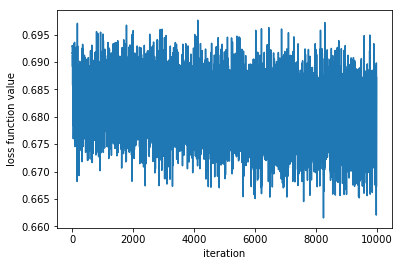

In [26]:
plt.plot(range(iters_num), train_loss)
plt.xlabel('iteration')
plt.ylabel('loss function value')
plt.show()

### 학습이 잘 안되는 이유 : FFNN은 시계열 데이터에 부적함.

In [65]:
cd = coin_dict['ADA'].head()
cd = np.array(cd)
print(cd)

[[ 0.5952381   0.86139995]
 [ 6.90669898  0.11924186]
 [ 5.39986329 -0.04229042]
 [ 3.66972477  1.03732511]
 [-0.26045906  0.17533541]]


In [60]:
np.random.choice(train_size, batch_size)

array([1702,  133,  619,  105, 1797,  920,  904, 1213,  189, 1665])

In [69]:
cd[[0,1]]

array([[0.5952381 , 0.86139995],
       [6.90669898, 0.11924186]])